In [8]:
import pandas as pd
import os
os.chdir('/Users/liyidan/desktop')      

In [21]:
#select the columns and rows needed from the clean sheet
df=pd.read_excel('Leda.Health.Internship.xlsx','clean',skiprows = 66, nrows=940,usecols = "BE:CQ")
#rename the columns needed (for convenience)

df.rename(columns={"are.you.currently.experiencing.partner.on.partner.abuse?.1":'current_partner_abuse',
                   "are.you.currently.experiencing.sexual.assault?.1":'current_sexual_assault'}, 
                 inplace=True)


df.rename(columns={"did.you.have.a.sexual.assault.evidence.kit.saek.performed?.1":'saek_performed',
                   "did.you.report.your.assault.to.the.police?.1":'report_to_police'}, 
                 inplace=True)

df.rename(columns={"do.you.trust.the.police?.1":'trust_police'}, 
                 inplace=True)

In [38]:
print(df)

                                  #.1   age  survivor  in_US  \
0    13lxbntsedxi5113lxbntatow9cnecoq  24.0       1.0    1.0   
1    w72a91vjf1z00mkw72a9e197ghuur3oi  74.0       0.0    NaN   
2    nsdw23asvr55o1o972nsdwn8v4390r8d  44.0       1.0    1.0   
3    a7xiz4awu64lblsbna7xiphbhstrfxbs  34.0       0.0    NaN   
4    x2n24ppibp0ldr4j0jx2n24pgjv2poh8  44.0       1.0    1.0   
..                                ...   ...       ...    ...   
935  8hcif6fukj6v2557d68hcif6fq8098rl  44.0       1.0    1.0   
936  g5fhm1drbjzqhbg5fh6xf7ut7c0wwp78  44.0       1.0    1.0   
937  ozu5jpdxxdlyhnoksvozu5jpdv4uoaga  34.0       0.0    NaN   
938  yzrq93ujqi190v9mwmp4yzrq93rgwhnd  44.0       0.0    NaN   
939                               NaN   NaN       NaN    NaN   

     gender_identification  gender_other  covid-19_mental_impact  \
0                      1.0           NaN                     1.0   
1                      NaN           NaN                     NaN   
2                      1.0 

In [10]:
#What percentage of people that are experiencing partner on partner abuse is experiencing sexual assault? 78.8%
partner_abuse=df[df.current_partner_abuse==1]
partner_abuse_and_sexaul_assualt=df[(df.current_partner_abuse==1)&(df.current_sexual_assault==1)]
percent=len(partner_abuse_and_sexaul_assualt)/len(partner_abuse)
print(percent)

0.7884615384615384


In [11]:
#What percentage of people that are experiencing sexual assult are experiencing partner on partner abuse? 82%
sexual_assault=df[df.current_sexual_assault==1]
partner_abuse_and_sexaul_assualt=df[(df.current_partner_abuse==1)&(df.current_sexual_assault==1)]
percent=len(partner_abuse_and_sexaul_assualt)/len(sexual_assault)
print(percent)

0.82


In [12]:
pd.crosstab(df.current_partner_abuse,df.current_sexual_assault)

current_sexual_assault,-1.0,0.5,1.0
current_partner_abuse,,,
-1.0,364,6,7
0.5,10,3,2
1.0,9,2,41


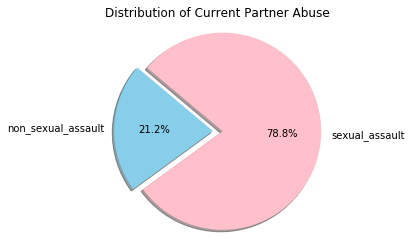

In [13]:
#visualization with a pie chart 1
# Data to plot
import matplotlib.pyplot as plt
labels = 'non_sexual_assault', 'sexual_assault'
sizes = [11,41]
colors = ['skyblue', 'pink']
explode = (0, 0.1)  # explode 2nd slice

# Plot
plt.pie(sizes,  explode=explode,labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Current Partner Abuse')
plt.show()

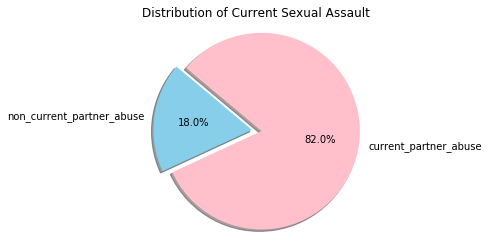

In [14]:
#visualization with a pie chart 2
# Data to plot
labels = 'non_current_partner_abuse', 'current_partner_abuse'
sizes = [9,41]
colors = ['skyblue', 'pink']
explode = (0, 0.1)  # explode 2nd slice

# Plot
plt.pie(sizes,  explode=explode,labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Current Sexual Assault')
plt.show()

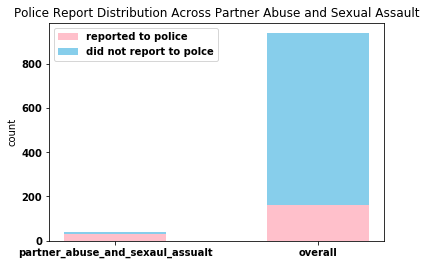

In [51]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
partner_abuse_and_sexaul_assualt=df[(df.current_partner_abuse==1)&(df.current_sexual_assault==1)]


#visualization of police report distribution across partner abuse and sexaul assault
 
# Values of each group
bars1 = [len(partner_abuse_and_sexaul_assualt[partner_abuse_and_sexaul_assualt.report_to_police==1]),len(df[df.report_to_police==1])]
bars2 = [len(partner_abuse_and_sexaul_assualt[partner_abuse_and_sexaul_assualt.report_to_police!=1]),len(df[df.report_to_police!=1])]

 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [1,3]
 
# Names of group and bar width
names = ['partner_abuse_and_sexaul_assualt','overall',]
barWidth = 1
 
# Create pink bars
plt.bar(r, bars1, color='pink', width=barWidth,label='reported to police')
# Create blue bars on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='skyblue', width=barWidth,label='did not report to polce')

# Custom X Y axis
plt.xticks(r, names)
plt.ylabel("count")
plt.legend()
plt.title('Police Report Distribution Across Partner Abuse and Sexual Assault')
# Show graphic
plt.show()


In [15]:
pd.crosstab(df.saek_performed,df.report_to_police)

report_to_police,-1.0,1.0
saek_performed,,
-1.0,427,51
1.0,16,110


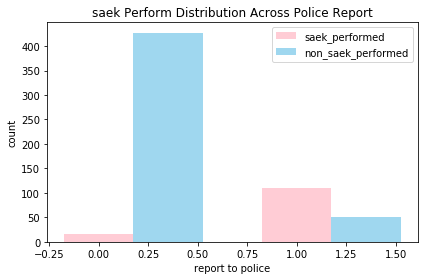

In [16]:
#distribution of "having a seak performed"
import numpy as np
import matplotlib.pyplot as plt
n_groups = 2
saek_performed = (16,110)
non_saek_performed = (427,51)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index,saek_performed, bar_width,
alpha=opacity,
color='pink',
label='saek_performed')

rects2 = plt.bar(index + bar_width, non_saek_performed, bar_width,
alpha=opacity,
color='skyblue',
label='non_saek_performed')

plt.xlabel('report to police')
plt.ylabel('count')
plt.title('saek Perform Distribution Across Police Report')

plt.legend()
plt.tight_layout()
plt.show()


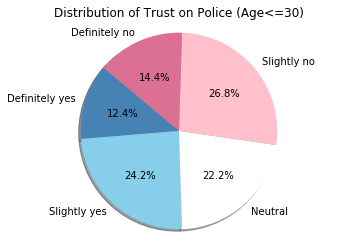

In [6]:
#do you trust the police (for survivors <=30 years old)?
# Data to plot
df1=df[df.age<=30]
labels = 'Definitely yes', 'Slightly yes','Neutral','Slightly no','Definitely no'
sizes = [len(df1[df1.trust_police==2]),len(df1[df1.trust_police==1]),len(df1[df1.trust_police==0]),len(df1[df1.trust_police==-1]),len(df1[df1.trust_police==-2])]
colors = ['steelblue','skyblue','white', 'pink','palevioletred']

# Plot
plt.pie(sizes,labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Trust on Police (Age<=30)')
plt.show()